In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
import sklearn as sk
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_excel('Final_clean_data.xlsx')
#df = df.drop(['Unnamed: 0', 'Perovskite_dimension_3D_with_2D_capping_layer_False'], axis=1)
display(df)
#df['Combined MAPbI3'] = df['Perovskite_composition_long_form_MAPbI']+df['Perovskite_composition_long_form_MAPbI3']
#df.drop(['Perovskite_composition_long_form_MAPbI', 'Perovskite_composition_long_form_MAPbI3'], axis=1, inplace=True)
#df.rename(columns={'Combined MAPbI3': 'PSK_MAPBI3'}, inplace=True)
#display(df)

,ETL_C60,ETL_C60 | BCP,ETL_PAA | PCBM-60 | BCP,ETL_PCBM-60,ETL_PCBM-60 | BCP,ETL_SnO2-c,ETL_SnO2-np,ETL_TiO2-c,ETL_TiO2-c | PCBM-60,ETL_TiO2-c | TiO2-mp,...,PSK_additives_Undoped,PSK_additives_nan,Cell_architecture_nip,Cell_architecture_pin,scan_speed,PCE,Voc,Jsc,FF,Hysteresis_index
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,125.0,0.00042,0.010,0.700,0.060,1.000000
1,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,50.0,0.03010,0.542,0.165,0.336,0.239203
2,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,20.0,0.06000,0.870,0.380,0.180,0.166667
3,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,20.0,0.07000,0.880,0.480,0.170,0.142857
4,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,20.0,0.09000,0.890,0.620,0.160,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,20.0,20.83000,1.138,23.670,0.770,0.017763
1211,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,40.0,21.09000,1.088,23.997,0.807,0.020863
1212,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,40.0,21.02000,1.074,24.317,0.805,0.009515
1213,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,10.0,21.54000,1.186,23.250,0.782,0.030641


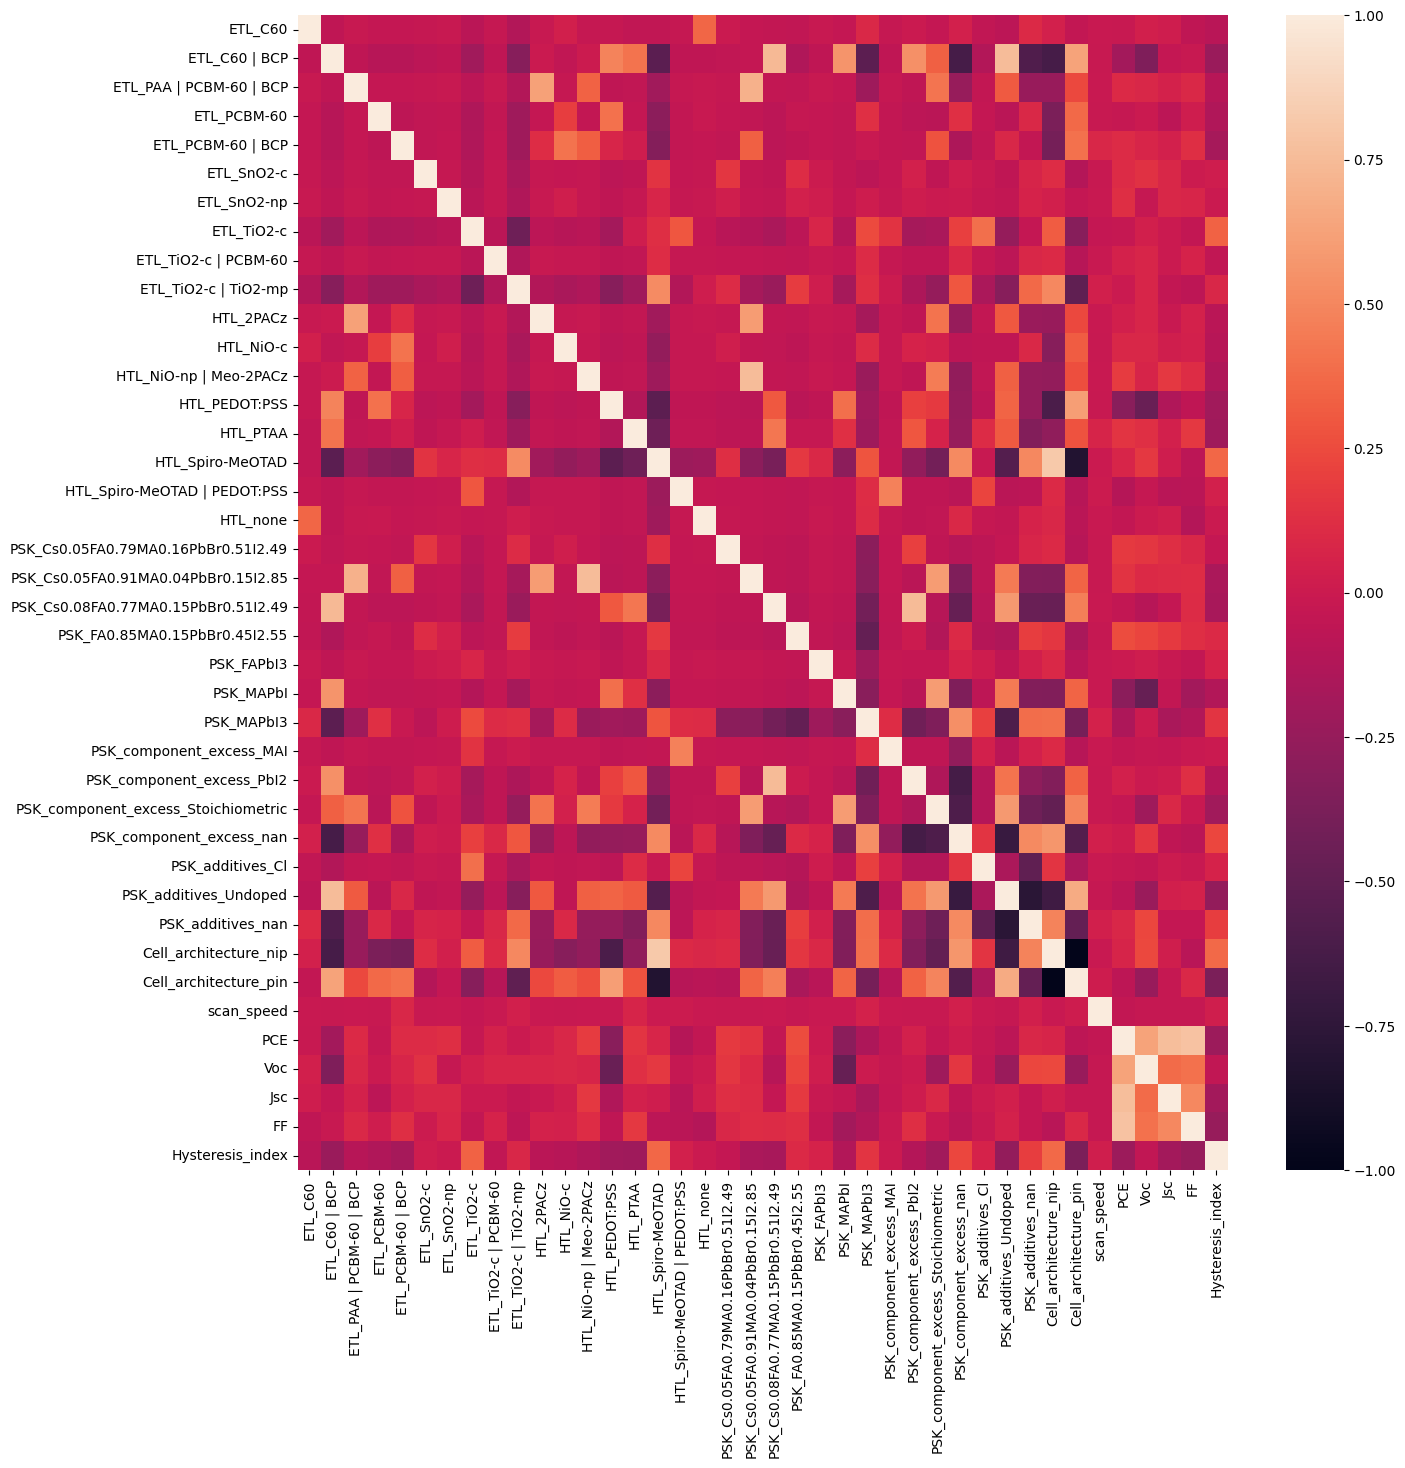

In [3]:
cor = df.corr()['Hysteresis_index']
cormatrix = df.corr()

fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(cormatrix)
plt.show()

#print(cor)
Cor = pd.DataFrame(cor)
Cor.to_clipboard()
#cormatrix.to_clipboard()

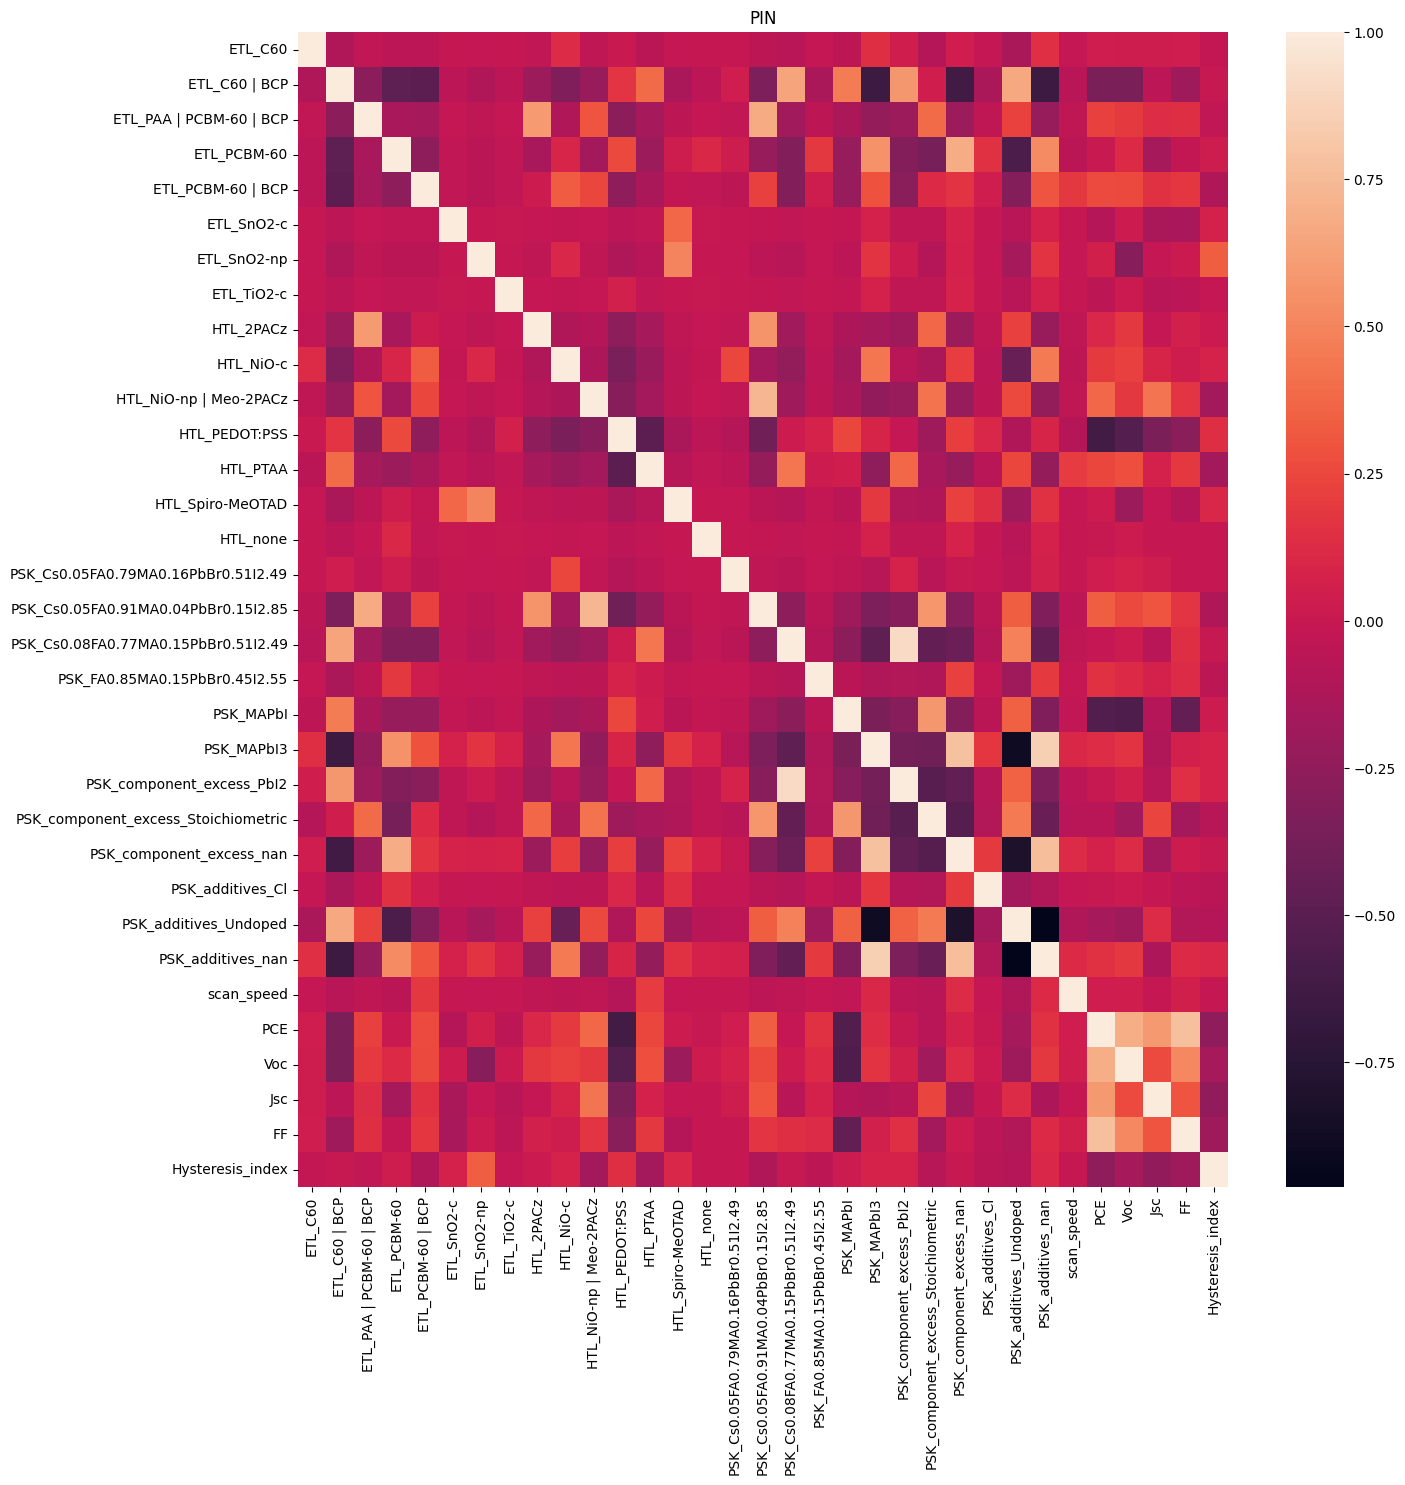

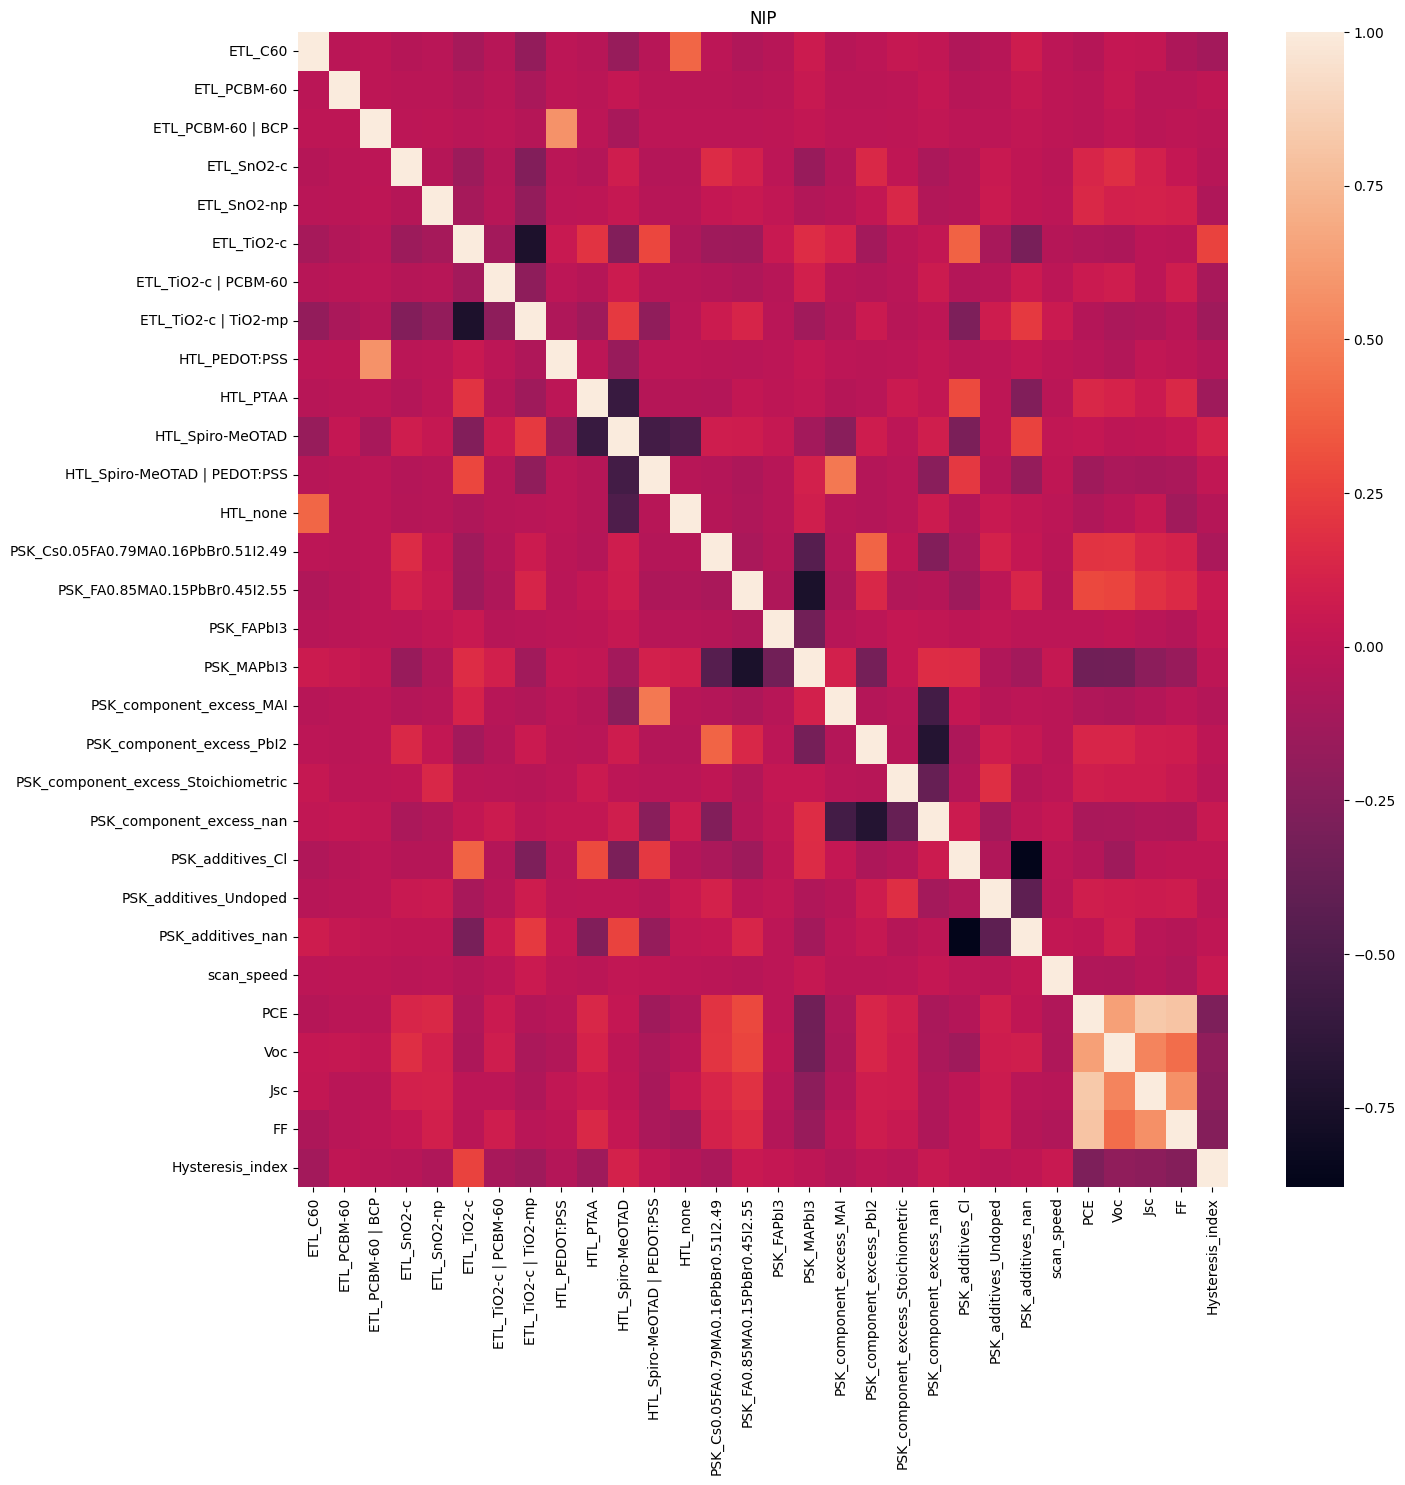

In [4]:
PIN = df[df['Cell_architecture_pin']==1]
# Identify columns with all 0s or all 1s
cols_to_drop = PIN.columns[(PIN == 0).all() | (PIN == 1).all()]
# Drop these columns
PIN = PIN.drop(columns=cols_to_drop)
#display(PIN)

NIP = df[df['Cell_architecture_nip']==1]
# Identify columns with all 0s or all 1s
cols_to_drop1 = NIP.columns[(NIP == 0).all() | (NIP == 1).all()]
# Drop these columns
NIP = NIP.drop(columns=cols_to_drop1)
#display(PIN)
corPIN=PIN.corr()['Hysteresis_index']
PINcormatrix = PIN.corr()
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(PINcormatrix)
plt.title('PIN')
plt.show()
#print(corPIN)
#CorPIN=pd.DataFrame(corPIN)
#CorPIN.to_clipboard()
#PINcormatrix.to_clipboard()
#display(NIP)
corNIP=NIP.corr()['Hysteresis_index']
NIPcormatrix = NIP.corr()
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(NIPcormatrix)
plt.title('NIP')
plt.show()
#print(corNIP)
CorNIP=pd.DataFrame(corNIP)
CorNIP.to_clipboard()
#NIPcormatrix.to_clipboard()

In [5]:
# Convert the correlation matrix to a long format Full data
corr_pairs = cormatrix.stack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
# Filter out self-correlations and duplicate pairs
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
corr_pairs['abs_correlation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation', 'abs_correlation'])

# Sort the correlations by absolute value (highest first)
sorted_corr_pairs = corr_pairs.sort_values(by='abs_correlation', ascending=False)
# Extract the top N highest correlations
top_n = 10
top_corr = sorted_corr_pairs.head(top_n)

#print(top_corr[['Variable 1', 'Variable 2', 'Correlation']])
# Assuming top_corr is your DataFrame containing the top correlations
top_corr_formatted = top_corr[['Variable 1', 'Variable 2', 'Correlation']]

# Optionally, round the correlation values to a desired number of decimal places
top_corr_formatted['Correlation'] = top_corr_formatted['Correlation'].round(3)

#print(top_corr_formatted)
# Copy the DataFrame to clipboard
#top_corr_formatted.to_clipboard(index=False)
display(top_corr_formatted)

C:\Users\shaj\AppData\Local\Temp\ipykernel_12828\2800534202.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_corr_formatted['Correlation'] = top_corr_formatted['Correlation'].round(3)


,Variable 1,Variable 2,Correlation
1313,Cell_architecture_nip,Cell_architecture_pin,-1.000
633,HTL_Spiro-MeOTAD,Cell_architecture_pin,-0.813
632,HTL_Spiro-MeOTAD,Cell_architecture_nip,0.813
1438,PCE,FF,0.786
1231,PSK_additives_Undoped,PSK_additives_nan,-0.775
1437,PCE,Jsc,0.762
70,ETL_C60 | BCP,PSK_additives_Undoped,0.757
499,HTL_NiO-np | Meo-2PACz,PSK_Cs0.05FA0.91MA0.04PbBr0.15I2.85,0.752
826,PSK_Cs0.08FA0.77MA0.15PbBr0.51I2.49,PSK_component_excess_PbI2,0.745
60,ETL_C60 | BCP,PSK_Cs0.08FA0.77MA0.15PbBr0.51I2.49,0.737


In [6]:
# Convert the correlation matrix to a long format PIN data
corr_pairs = PINcormatrix.stack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
# Filter out self-correlations and duplicate pairs
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
corr_pairs['abs_correlation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation', 'abs_correlation'])

# Sort the correlations by absolute value (highest first)
sorted_corr_pairs = corr_pairs.sort_values(by='abs_correlation', ascending=False)
# Extract the top N highest correlations
top_n = 10
top_corr = sorted_corr_pairs.head(top_n)

#print(top_corr[['Variable 1', 'Variable 2', 'Correlation']])
# Assuming top_corr is your DataFrame containing the top correlations
top_corr_formatted = top_corr[['Variable 1', 'Variable 2', 'Correlation']]

# Optionally, round the correlation values to a desired number of decimal places
top_corr_formatted['Correlation'] = top_corr_formatted['Correlation'].round(3)

#print(top_corr_formatted)
# Copy the DataFrame to clipboard
#top_corr_formatted.to_clipboard(index=False)
display(top_corr_formatted)

C:\Users\shaj\AppData\Local\Temp\ipykernel_12828\3688498473.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_corr_formatted['Correlation'] = top_corr_formatted['Correlation'].round(3)


,Variable 1,Variable 2,Correlation
851,PSK_additives_Undoped,PSK_additives_nan,-0.962
582,PSK_Cs0.08FA0.77MA0.15PbBr0.51I2.49,PSK_component_excess_PbI2,0.909
685,PSK_MAPbI3,PSK_additives_Undoped,-0.891
686,PSK_MAPbI3,PSK_additives_nan,0.852
784,PSK_component_excess_nan,PSK_additives_Undoped,-0.816
683,PSK_MAPbI3,PSK_component_excess_nan,0.782
955,PCE,FF,0.776
785,PSK_component_excess_nan,PSK_additives_nan,0.770
346,HTL_NiO-np | Meo-2PACz,PSK_Cs0.05FA0.91MA0.04PbBr0.15I2.85,0.731
953,PCE,Voc,0.688


In [7]:
# Convert the correlation matrix to a long format NIP data
corr_pairs = NIPcormatrix.stack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
# Filter out self-correlations and duplicate pairs
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]
corr_pairs['abs_correlation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.drop_duplicates(subset=['Correlation', 'abs_correlation'])

# Sort the correlations by absolute value (highest first)
sorted_corr_pairs = corr_pairs.sort_values(by='abs_correlation', ascending=False)
# Extract the top N highest correlations
top_n = 10
top_corr = sorted_corr_pairs.head(top_n)

#print(top_corr[['Variable 1', 'Variable 2', 'Correlation']])
# Assuming top_corr is your DataFrame containing the top correlations
top_corr_formatted = top_corr[['Variable 1', 'Variable 2', 'Correlation']]

# Optionally, round the correlation values to a desired number of decimal places
top_corr_formatted['Correlation'] = top_corr_formatted['Correlation'].round(3)

#print(top_corr_formatted)
# Copy the DataFrame to clipboard
#top_corr_formatted.to_clipboard(index=False)
display(top_corr_formatted)

C:\Users\shaj\AppData\Local\Temp\ipykernel_12828\3104411066.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_corr_formatted['Correlation'] = top_corr_formatted['Correlation'].round(3)


,Variable 1,Variable 2,Correlation
653,PSK_additives_Cl,PSK_additives_nan,-0.879
777,PCE,Jsc,0.825
778,PCE,FF,0.806
436,PSK_FA0.85MA0.15PbBr0.45I2.55,PSK_MAPbI3,-0.747
157,ETL_TiO2-c,ETL_TiO2-c | TiO2-mp,-0.734
560,PSK_component_excess_PbI2,PSK_component_excess_nan,-0.697
776,PCE,Voc,0.638
280,HTL_PTAA,HTL_Spiro-MeOTAD,-0.595
68,ETL_PCBM-60 | BCP,HTL_PEDOT:PSS,0.577
838,Jsc,FF,0.571
